<a href="https://colab.research.google.com/github/PraveenPrabhat125/DataScience-/blob/main/maths_and_statisic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

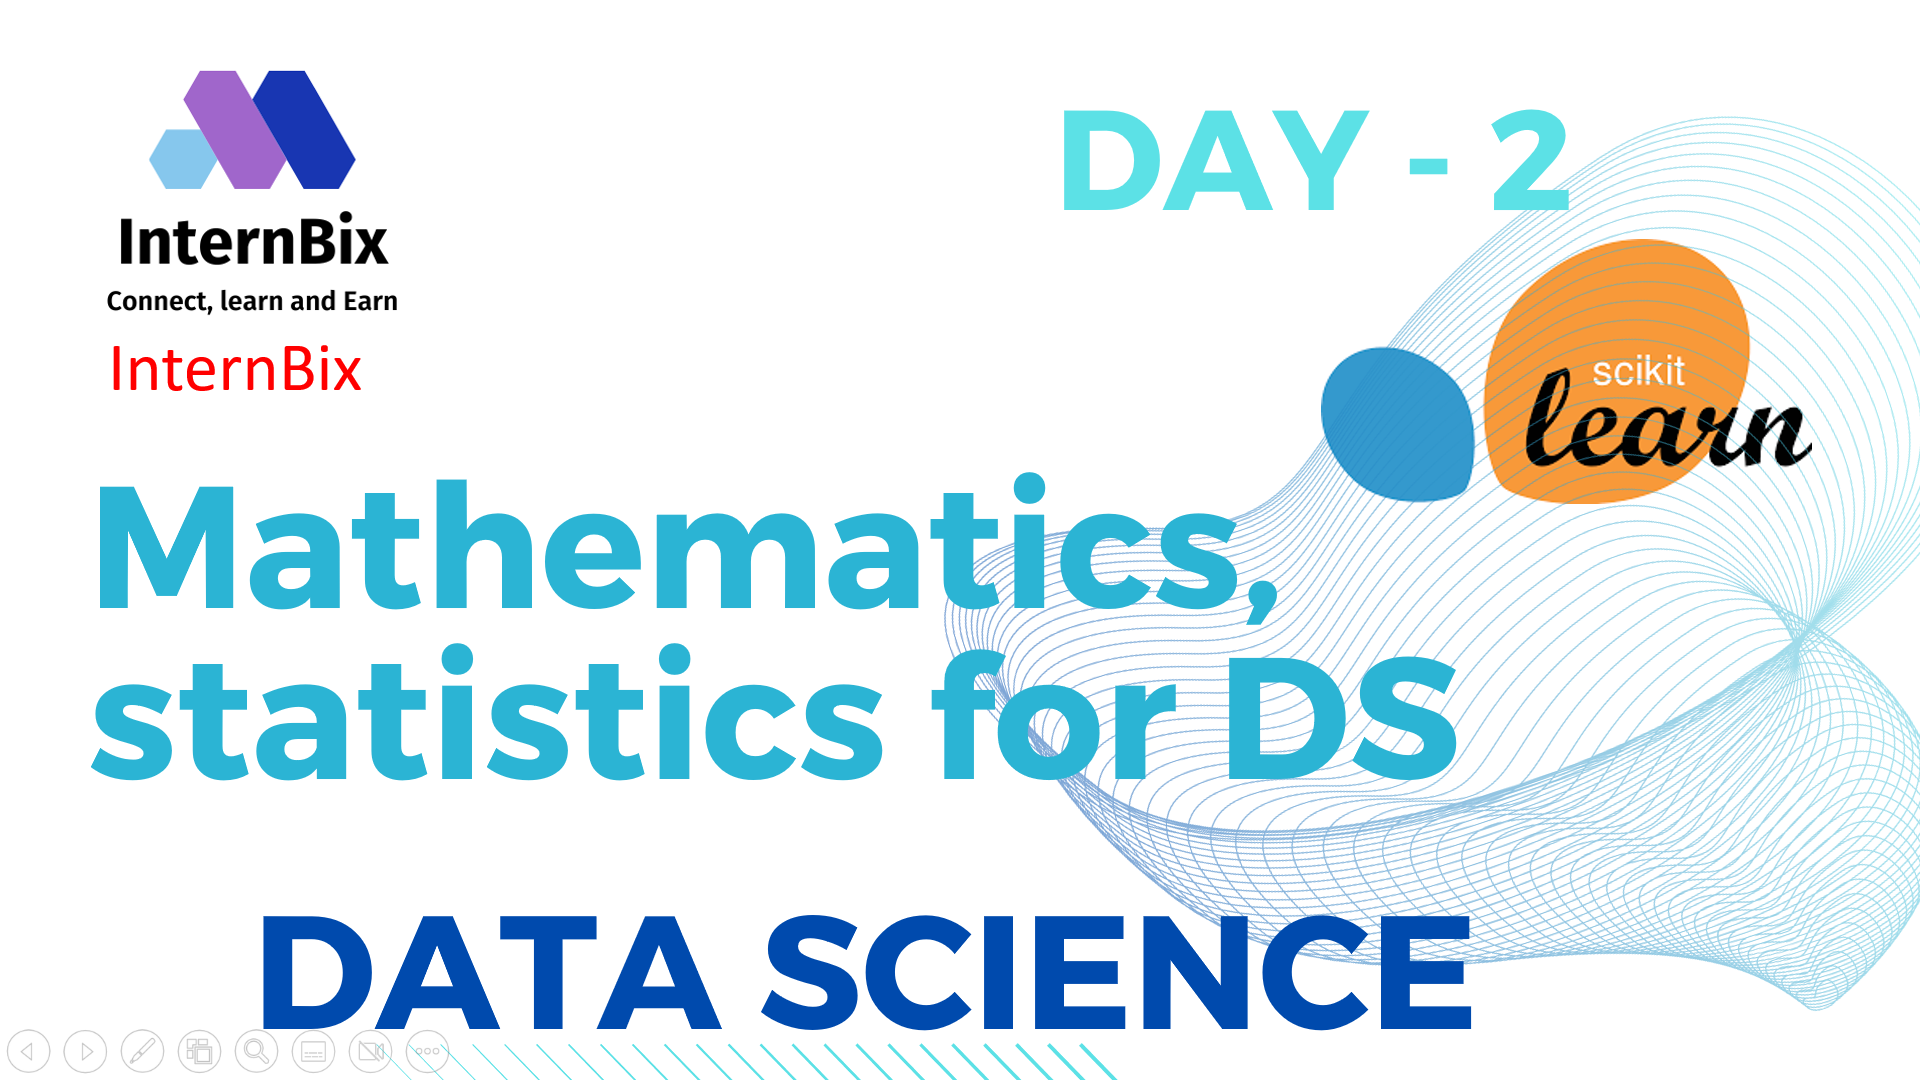

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('revenue.csv')

In [5]:
df.head()

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6


In [8]:
df.columns

Index(['company', 'revenue'], dtype='object')

<Axes: xlabel='company'>

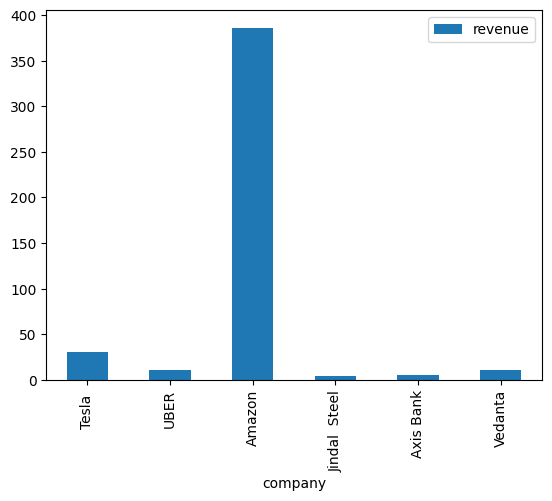

In [12]:
df.plot(x = 'company', y = 'revenue', kind = 'bar')

Note: the jindal steel and axis bank, vedanta revenue seems too small and in graph we can see difference. so, we use log scal for this

<Axes: xlabel='company'>

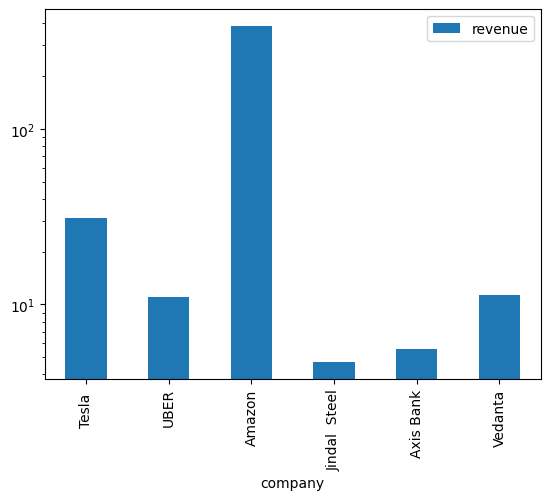

In [13]:
df.plot(x = 'company', y =  'revenue', kind = 'bar', logy = True )

In [14]:
df.head()

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6


In [17]:
df['log_val_base_e'] = np.log(df['revenue'])

df['log_val_base_10'] = np.log10(df['revenue'])
df.head()

,company,revenue,log_val,log_val_base_e,log_val_base_10
0,Tesla,31.0,3.433987,3.433987,1.491362
1,UBER,11.0,2.397895,2.397895,1.041393
2,Amazon,386.0,5.955837,5.955837,2.586587
3,Jindal Steel,4.7,1.547563,1.547563,0.672098
4,Axis Bank,5.6,1.722767,1.722767,0.748188


<Axes: xlabel='company'>

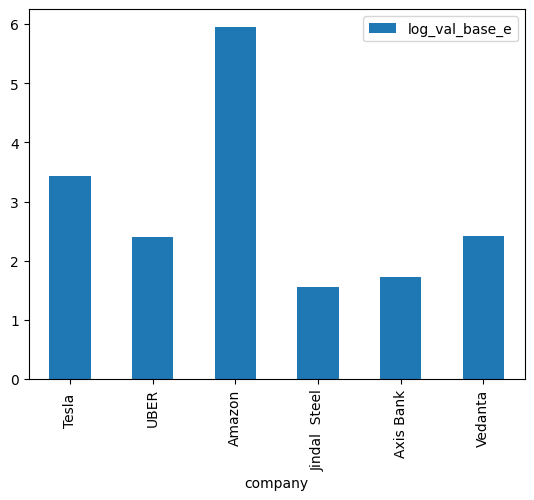

In [19]:
df.plot(x = 'company', y = 'log_val_base_e', kind = 'bar')

<Axes: xlabel='company'>

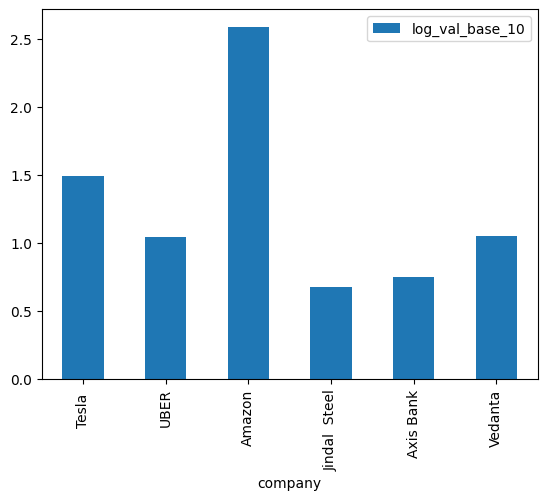

In [20]:
df.plot(x = 'company', y = 'log_val_base_10', kind = 'bar')

In [23]:
df1 = pd.read_csv('income.csv')
df1.head()

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6


<Axes: xlabel='company'>

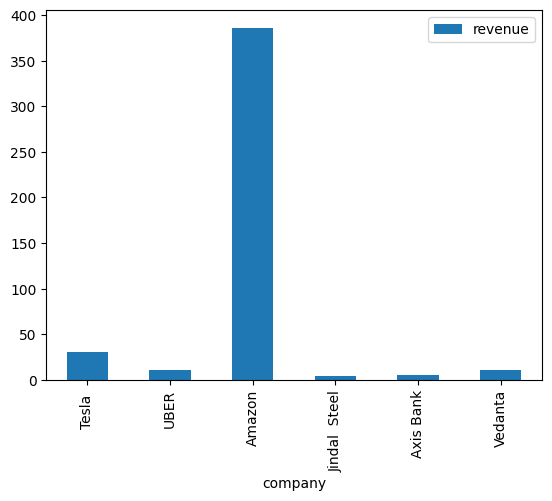

In [25]:
df1.plot(x = 'company' , y = 'revenue', kind = 'bar')

<Axes: xlabel='company'>

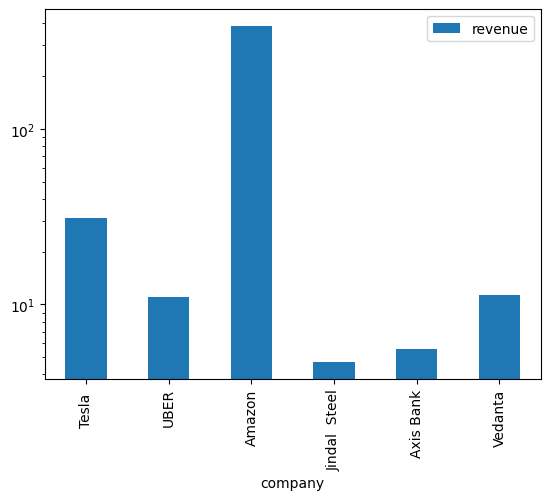

In [26]:
df.plot(x = 'company', y = 'revenue', kind = 'bar', logy = True)

Normal Distribution and Z Score: Math and statistics for data science
https://www.kaggle.com/datasets/mustafaali96/weight-height

In [28]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Gender'>

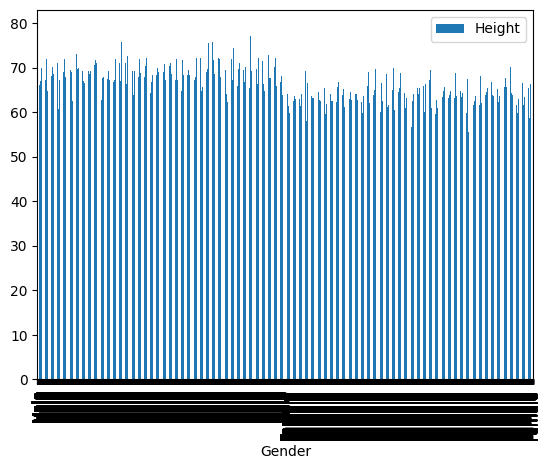

In [29]:
df.plot(x = 'Gender', y = 'Height', kind = 'bar')

In [30]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Count'>

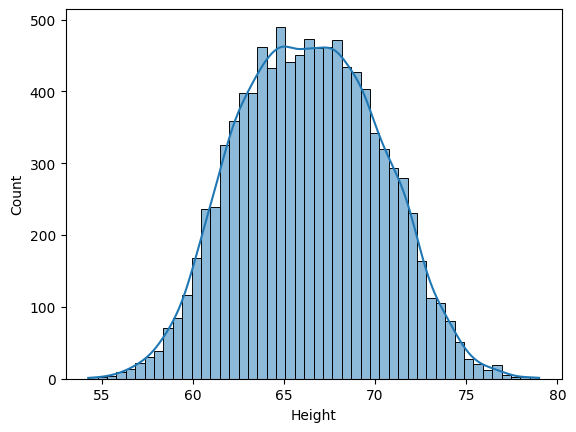

In [32]:
sns.histplot(df.Height, kde = True)

In [34]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [35]:
mean = df.Height.mean()
mean

66.36755975482124

In [38]:
std = df.Height.std()
std

3.8475281207732293

In [39]:
mean - 3*std

54.82497539250156

In [40]:
mean + 3*std

77.91014411714093

In [43]:
data = df[(df.Height > mean - 3*std) &  (df.Height < mean + 3*std) ]
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Count'>

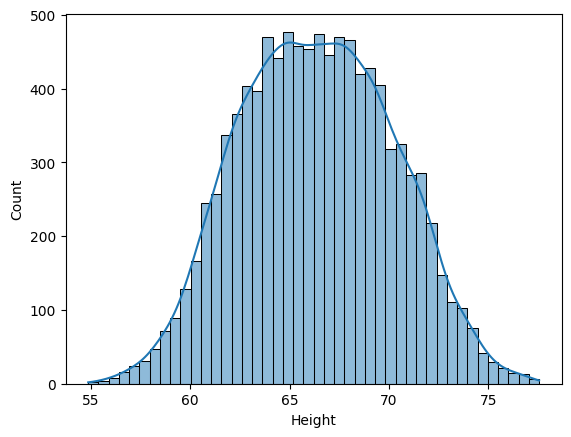

In [45]:
sns.histplot(data = data.Height, kde = True)

(2) Outlier detection and removal using Z Score

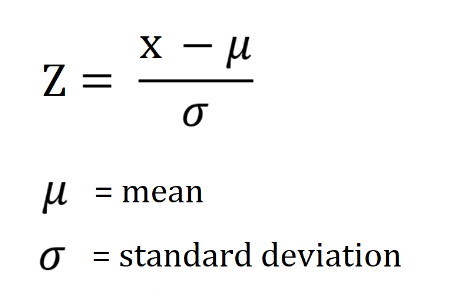
Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score



Let's add a new column in our dataframe for this Z score

In [48]:
mean = df.Height.mean()
std = df.Height.std()
data['z_score'] = (df.Height - df.Height.mean())/ df.Height.std()

<ipython-input-48-be619e5e4ae3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['z_score'] = (df.Height - df.Height.mean())/ df.Height.std()


In [49]:
data.head()

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


<Axes: xlabel='z_score', ylabel='Count'>

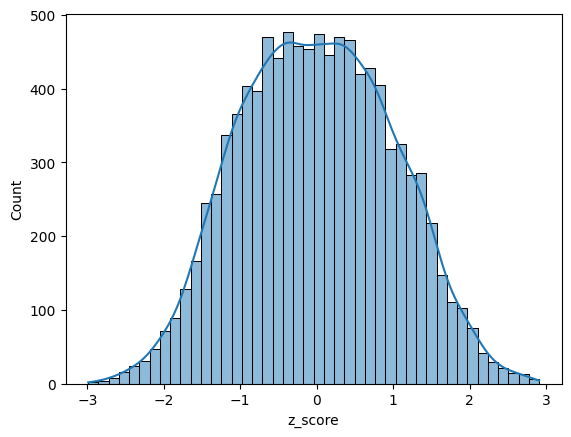

In [51]:
sns.histplot(data.z_score, kde = True)

In [60]:
data[data['z_score'] < -2.8]

,Gender,Height,Weight,z_score
5345,Female,55.336492,88.366583,-2.867053
7294,Female,54.873728,78.606670,-2.987329
7617,Female,55.148557,88.812412,-2.915899


In [62]:
data[data['z_score'] > 2.8]

,Gender,Height,Weight,z_score
912,Male,77.160801,228.707301,2.805240
1922,Male,77.446620,232.651079,2.879527
2070,Male,77.465569,252.556689,2.884452
4569,Male,77.547186,242.041173,2.905665


In [64]:
data.shape

(9993, 4)

In [67]:
data_outlier_free = data[(data['z_score'] > -2.8) & (data['z_score'] < 2.8) ]

In [68]:
data_outlier_free.shape

(9986, 4)